## Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.



In [1]:
import pandas as pd


In [134]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

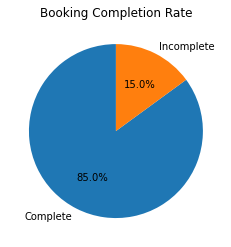

In [136]:

# Create a pie chart of booking completion
df['booking_complete'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False, startangle=90, 
                                              labels=['Complete', 'Incomplete'], 
                                              title='Booking Completion Rate',legend=False)

# Add a title and label for the chart
plt.title('Booking Completion Rate')
#plt.xlabel('Completion Status')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

In [150]:

# Preprocessing
# Encode categorical variables
le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df['trip_type'] = le.fit_transform(df['trip_type'])
df['flight_day'] = le.fit_transform(df['flight_day'])
df['route'] = le.fit_transform(df['route'])
df['booking_origin'] = le.fit_transform(df['booking_origin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int32  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.4 MB

In [138]:
# Create a stacked count bar plot
def stacked_bar_plot(variable1,variable2,data):
    ax = data.groupby([variable1, variable2]).size().reset_index().pivot(columns=variable2, index=variable1, values=0)
    ax = ax.div(ax.sum(1), axis=0)
    ax = ax.plot(kind='bar', stacked=True)
    plt.legend(title = variable2)
    plt.ylabel("percentage")
    plt.title("Relative Frequency of {} by {} (in %)".format(variable2, variable1))
    plt.legend(title = variable2, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

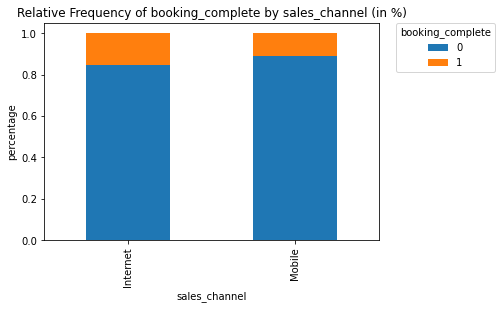

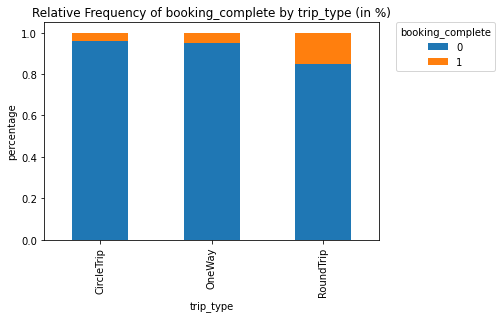

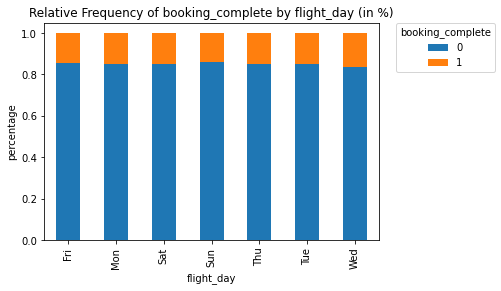

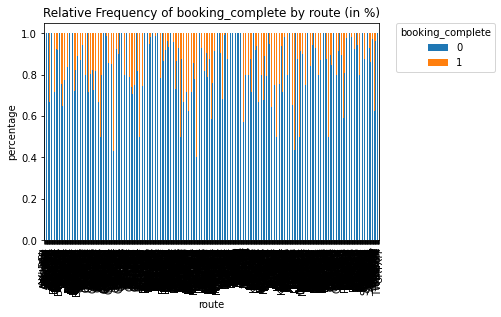

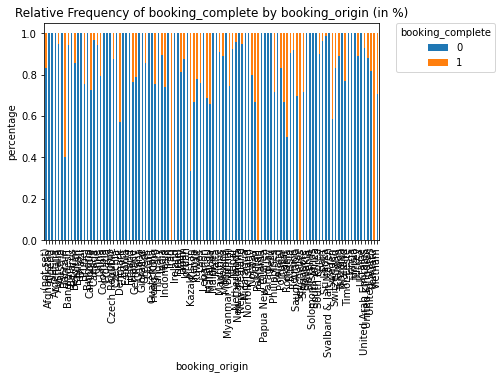

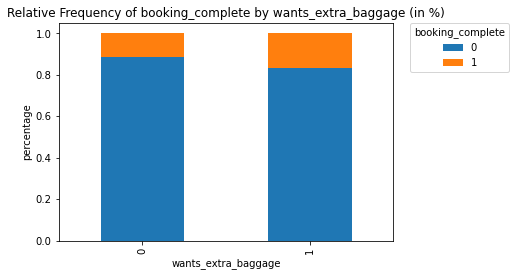

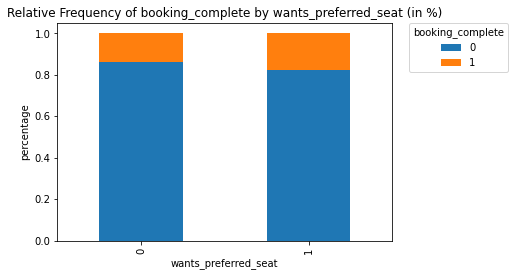

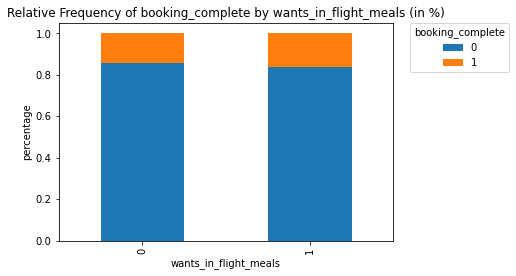

In [139]:
stacked_bar_plot('sales_channel','booking_complete',df)
stacked_bar_plot('trip_type','booking_complete',df)
stacked_bar_plot('flight_day','booking_complete',df)
stacked_bar_plot('route','booking_complete',df)
stacked_bar_plot('booking_origin','booking_complete',df)
stacked_bar_plot('wants_extra_baggage','booking_complete',df)
stacked_bar_plot('wants_preferred_seat','booking_complete',df)
stacked_bar_plot('wants_in_flight_meals','booking_complete',df)

In [93]:
    variable1='booking_origin'
    variable2='booking_complete'
    ax = df.groupby([variable1, variable2]).size().reset_index().pivot(columns=variable2, index=variable1, values=0)
    ax = ax.div(ax.sum(1), axis=0)
    booking_origin_sublist= ax[0][ax[0]<.80].index.values
    
    variable1='route'
    variable2='booking_complete'
    ax = df.groupby([variable1, variable2]).size().reset_index().pivot(columns=variable2, index=variable1, values=0)
    ax = ax.div(ax.sum(1), axis=0)
    route_sublist= ax[0][ax[0]<.80].index.values

In [140]:

def stacked_hist(variable1,variable2,data,value1=0,value2=1,label1='incomplete',label2='complete'):
    #density=true adjust the histograms for different group sizes
    plt.hist(data[data[variable2] == value1][variable1], alpha=0.5, label=label1,density=True)
    plt.hist(data[data[variable2] == value2][variable1], alpha=0.5, label=label2,density=True)
    plt.xlabel(variable1)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

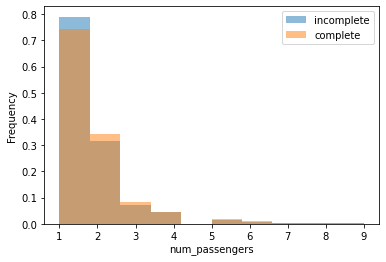

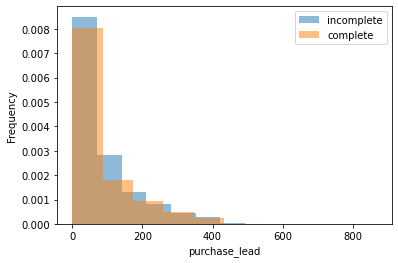

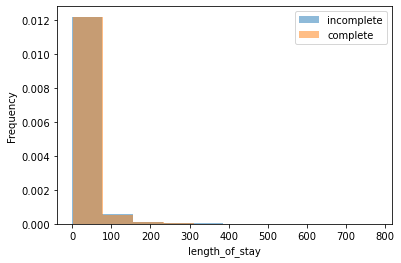

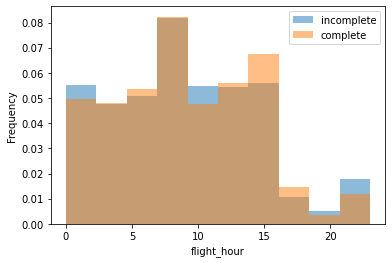

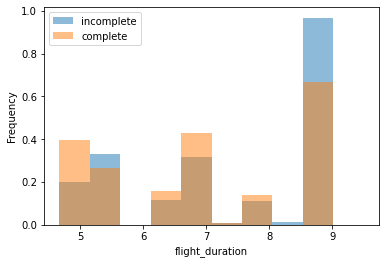

In [141]:

stacked_hist('num_passengers','booking_complete',df)
stacked_hist('purchase_lead','booking_complete',df)
stacked_hist('length_of_stay','booking_complete',df)
stacked_hist('flight_hour','booking_complete',df)
stacked_hist('flight_duration','booking_complete',df)

In [117]:
#'sales_channel','trip_type','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'
#df_new=df[['booking_complete','purchase_lead']]


In [119]:
#df_new['route']=df['route'].isin(route_sublist).astype(int)


In [120]:
#df_new['booking_origin']=df['booking_origin'].isin(booking_origin_sublist).astype(int)


In [121]:
#df=df_new

In [143]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [151]:
# Split the dataframe into majority and minority classes
df_majority = df[df.booking_complete==0]
df_minority = df[df.booking_complete==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [158]:
df_upsampled['booking_complete'].value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

In [152]:

# Split dataset into training and testing sets
X = df_upsampled.drop(['booking_complete'], axis=1)
y = df_upsampled['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [153]:

# Create and fit the model
clf = RandomForestClassifier(random_state=42)
# Perform 5-fold cross-validation
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


#param_grid = {'n_estimators': [10, 50, 100],
#               'max_depth': [None, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2']}
#grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
#print("Best parameters: ", grid_search.best_params_)
#print("Best accuracy: ", grid_search.best_score_)

# Get the best model
#best_model = grid_search.best_estimator_


# Get the index of the best model
#best_index = grid_search.best_index_

# Get the cross-validated scores of the best model
#cv_scores = grid_search.cv_results_['mean_test_score'][best_index]
#print("Cross-validated scores: ", cv_scores)

Cross-validation scores: [0.94488131 0.94304402 0.94855589 0.9484824  0.94774748]
Mean cross-validation score: 0.9465422209157051


In [154]:

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
# Classification report
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9603151272855547
Confusion matrix:
 [[7892  621]
 [  54 8442]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      8513
           1       0.93      0.99      0.96      8496

    accuracy                           0.96     17009
   macro avg       0.96      0.96      0.96     17009
weighted avg       0.96      0.96      0.96     17009



    - Precision: the proportion of true positive predictions out of all positive predictions. It is a measure of the model's ability to correctly identify positive instances.
    - Recall: the proportion of true positive predictions out of all actual positive instances. It is a measure of the model's ability to identify all the positive instances.
    - F1-score: the harmonic mean of precision and recall, it balance between precision and recall.
    - Support: the number of samples of the true response that lie in that class.

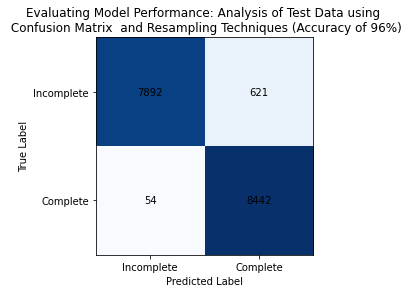

In [161]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Evaluating Model Performance: Analysis of Test Data using \n Confusion Matrix  and Resampling Techniques (Accuracy of 96%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Add the numbers to the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

class_labels = ['Incomplete','Complete']
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)

plt.show()

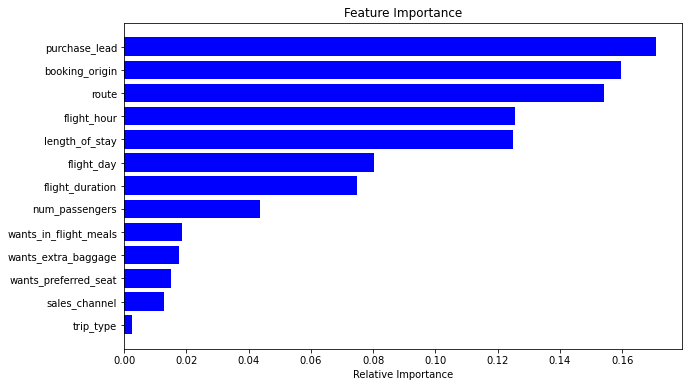

In [156]:

# Visualization of contributing regressors
# Feature importance
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()